<a href="https://colab.research.google.com/github/Leslie-T-art/MACHINE-LEARNING-ASSIGNMENT-2/blob/main/FINALASS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# importing all necessary computations and libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from sklearn import model_selection, metrics  #to include metrics for evaluation # this used to be cross_validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
%matplotlib inline
import pickle
import os


In [35]:
#mounting to drive 

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
#reading csv file from googledrive and passing it into a dataframe 

customerchurn = pd.read_csv('/content/drive/My Drive/datasets/customerchurn.csv')

In [37]:
#displaying information in the dataframe

display(customerchurn)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


DATA ANALYSIS AND MANIPULATION 

In [83]:
#checking  the total number of rows and columns in the dataframe 
customerchurn.shape

(7043, 19)

In [39]:
#displaying the column names in the datraframe 
customerchurn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [84]:
#viewing the datatypes in the dataframe 
customerchurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [41]:
customerchurn['TotalCharges'] = pd.to_numeric(customerchurn['TotalCharges'], errors = 'coerce')
customerchurn.loc[customerchurn['TotalCharges'].isna()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [42]:
#totalcharges is float but it is supposed to be a floating point value because there are null values 
customerchurn[customerchurn['TotalCharges'].isna()==True] = 0
customerchurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [43]:
customerchurn['OnlineBackup'].unique

<bound method Series.unique of 0       Yes
1        No
2       Yes
3        No
4        No
       ... 
7038     No
7039    Yes
7040     No
7041     No
7042     No
Name: OnlineBackup, Length: 7043, dtype: object>

In [44]:
#viewing the colums with null values so that if we have any we will replace them with customerchurn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [85]:
#viewing the Churn column
customerchurn['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [46]:
#encoding the categorical data into numeric to make it easir for the machine learning model to work with 

customerchurn['gender'].replace(['Male','Female'],[0,1],inplace=True)
customerchurn['Partner'].replace(['Yes','No'],[1,0],inplace=True)
customerchurn['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
customerchurn['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
customerchurn['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)
customerchurn['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
customerchurn['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
customerchurn['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
customerchurn['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
customerchurn['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
customerchurn['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
customerchurn['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
customerchurn['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
customerchurn['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
customerchurn['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
customerchurn['Churn'].replace(['Yes','No'],[1,0],inplace=True)
 
customerchurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [47]:
#viewing the encoded dataset
customerchurn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,1,84.80,1990.50,0
7039,2234-XADUH,1,0,1,1,72,1,1,2,0,1,1,0,1,1,1,1,3,103.20,7362.90,0
7040,4801-JZAZL,1,0,1,1,11,0,0,1,1,0,0,0,0,0,0,1,0,29.60,346.45,0
7041,8361-LTMKD,0,1,1,0,4,1,1,2,0,0,0,0,0,0,0,1,1,74.40,306.60,1


In [48]:
#dropping the customerID column because it has unique rows therefore will make the dataset very large and unnessesarily tedious

 customerchurn.drop(['customerID'], axis=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,0,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,1,84.80,1990.50,0
7039,1,0,1,1,72,1,1,2,0,1,1,0,1,1,1,1,3,103.20,7362.90,0
7040,1,0,1,1,11,0,0,1,1,0,0,0,0,0,0,1,0,29.60,346.45,0
7041,0,1,1,0,4,1,1,2,0,0,0,0,0,0,0,1,1,74.40,306.60,1


In [49]:
customerchurn.pop('TotalCharges')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [50]:
#viewing information of the encoded data 
customerchurn.info()    # we can see that the columns are all numeric except for the customerID column which cannot be encoded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [51]:
customerchurn.pop('customerID')                                #dropping the customerID column 

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7043, dtype: object

In [52]:
customerchurn.info()                                              # displaying the dataset once more to see whether the customerID column has been dropped

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [53]:
customerchurn                     #viewing the encoded dataset once more to make sure that the dropped columns are really dropped

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,0
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,0
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,1
3,0,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,2,42.30,0
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,1,84.80,0
7039,1,0,1,1,72,1,1,2,0,1,1,0,1,1,1,1,3,103.20,0
7040,1,0,1,1,11,0,0,1,1,0,0,0,0,0,0,1,0,29.60,0
7041,0,1,1,0,4,1,1,2,0,0,0,0,0,0,0,1,1,74.40,1


In [54]:
customerchurn.describe()          #describing each column of the dataset 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.494534,0.162147,0.481755,0.298026,32.371149,0.901888,0.421269,1.222206,0.286100,0.344314,0.343320,0.289649,0.383785,0.387761,0.687491,0.591793,1.313503,64.697004,0.265370
std,0.500006,0.368612,0.499702,0.457424,24.559481,0.297487,0.493798,0.779535,0.451969,0.475178,0.474851,0.453632,0.486341,0.487274,0.832727,0.491537,1.149799,30.171186,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.450000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,70.350000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,1.000000


CALCULATING CORRELATIONS AND ANALYZING CORRELATIONS

In [55]:
 corr_matrix = customerchurn.corr()             #calculating the correlation matrix

In [56]:
corr_matrix                                     #displaying the correlation matrix

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
gender,1.000000,0.002498,0.002869,-0.009329,-0.003235,0.012146,0.010191,0.012043,0.017290,0.014199,0.001925,0.009486,0.008337,0.011324,0.001183,0.013742,0.006686,0.017037,0.009466
SeniorCitizen,0.002498,1.000000,0.017605,-0.210000,0.016567,0.010416,0.143480,0.259572,-0.038123,0.067124,0.059978,-0.060109,0.105921,0.120313,-0.141155,0.156885,-0.092816,0.220525,0.150889
Partner,0.002869,0.017605,1.000000,0.452773,0.383103,0.022824,0.143663,0.003300,0.144152,0.142781,0.154473,0.121043,0.125522,0.119164,0.294968,-0.012115,0.134770,0.100636,-0.148924
Dependents,-0.009329,-0.210000,0.452773,1.000000,0.164453,0.002021,-0.023415,-0.175790,0.081379,0.024360,0.014626,0.063663,-0.015681,-0.037532,0.241189,-0.108742,0.124999,-0.109715,-0.162416
tenure,-0.003235,0.016567,0.383103,0.164453,1.000000,0.014062,0.333517,0.034403,0.329054,0.361993,0.362372,0.326059,0.281373,0.286514,0.677156,0.007294,0.342483,0.250060,-0.352229
PhoneService,0.012146,0.010416,0.022824,0.002021,0.014062,1.000000,0.281401,0.100759,-0.087983,-0.048299,-0.066112,-0.091393,-0.017475,-0.029445,0.006911,0.022267,0.002338,0.255527,0.014454
MultipleLines,0.010191,0.143480,0.143663,-0.023415,0.333517,0.281401,1.000000,0.346300,0.099350,0.202997,0.202500,0.101184,0.258584,0.259980,0.108512,0.165074,0.037476,0.491727,0.040801
InternetService,0.012043,0.259572,0.003300,-0.175790,0.034403,0.100759,0.346300,1.000000,0.157695,0.308283,0.314462,0.165729,0.430516,0.427740,-0.286120,0.379443,-0.175327,0.905650,0.317126
OnlineSecurity,0.017290,-0.038123,0.144152,0.081379,0.329054,-0.087983,0.099350,0.157695,1.000000,0.283797,0.275392,0.354866,0.176155,0.188062,0.246269,-0.002853,0.163762,0.297410,-0.170573
OnlineBackup,0.014199,0.067124,0.142781,0.024360,0.361993,-0.048299,0.202997,0.308283,0.283797,1.000000,0.303629,0.294214,0.282243,0.275176,0.156052,0.128225,0.097403,0.442188,-0.081569


In [57]:
corr_matrix["MonthlyCharges"].sort_values(ascending=False)                      #displaying the correlation matrix in descending order 

MonthlyCharges      1.000000
InternetService     0.905650
StreamingTV         0.629741
StreamingMovies     0.627335
MultipleLines       0.491727
DeviceProtection    0.483097
OnlineBackup        0.442188
PaperlessBilling    0.354303
TechSupport         0.339117
OnlineSecurity      0.297410
PhoneService        0.255527
tenure              0.250060
SeniorCitizen       0.220525
Churn               0.194125
Partner             0.100636
gender              0.017037
Contract           -0.069668
PaymentMethod      -0.070462
Dependents         -0.109715
Name: MonthlyCharges, dtype: float64

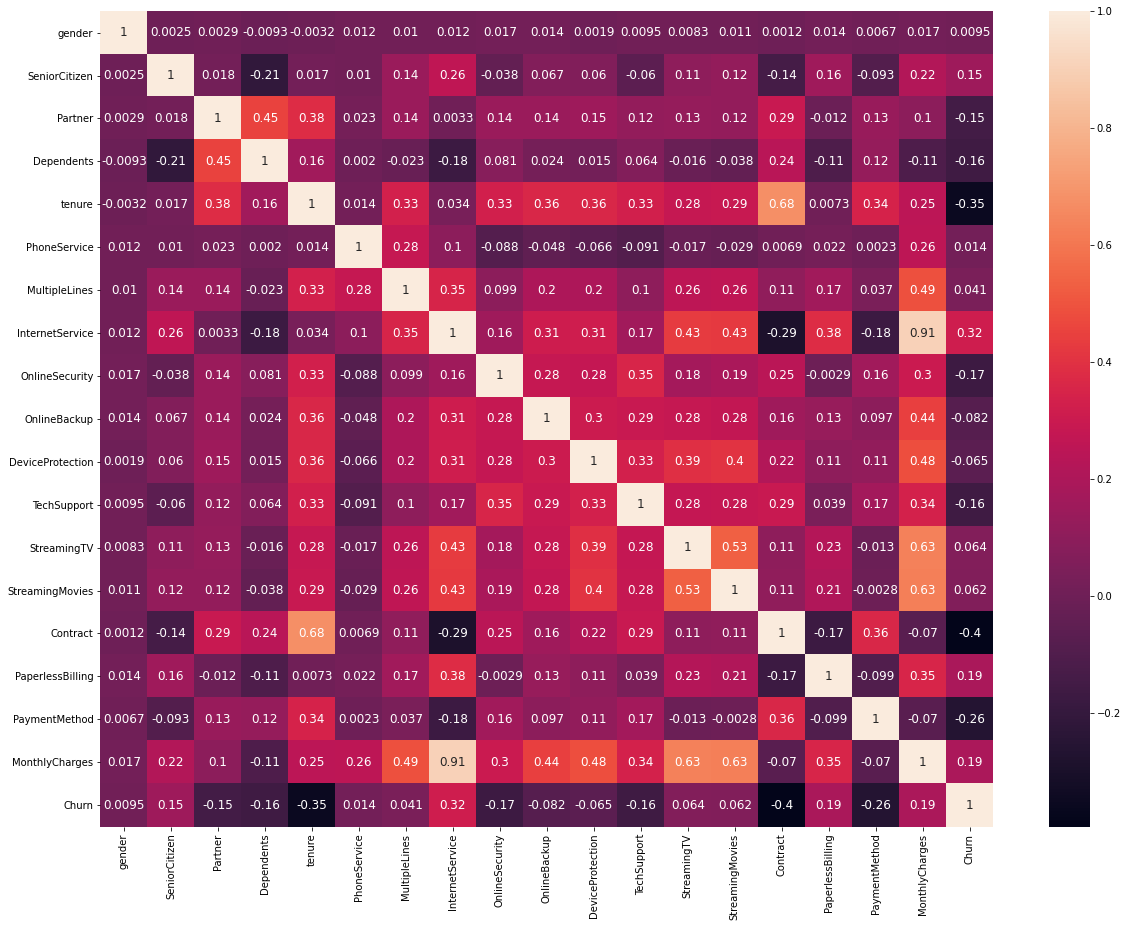

In [58]:
#printing a correlation heatmap to have a visual of the correlation of the dataa in dataset

corr = customerchurn.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

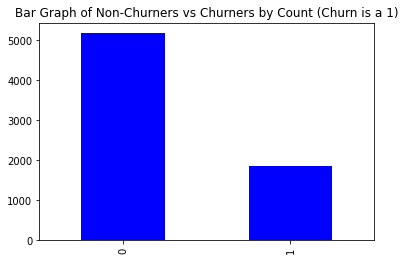

In [59]:
#printing a graph to visualise the difference between churners and non-churners

customerchurn['Churn'].value_counts().plot(kind = 'bar', title = 'Bar Graph of Non-Churners vs Churners by Count (Churn is a 1)', color = 'blue', align = 'center')
plt.show()

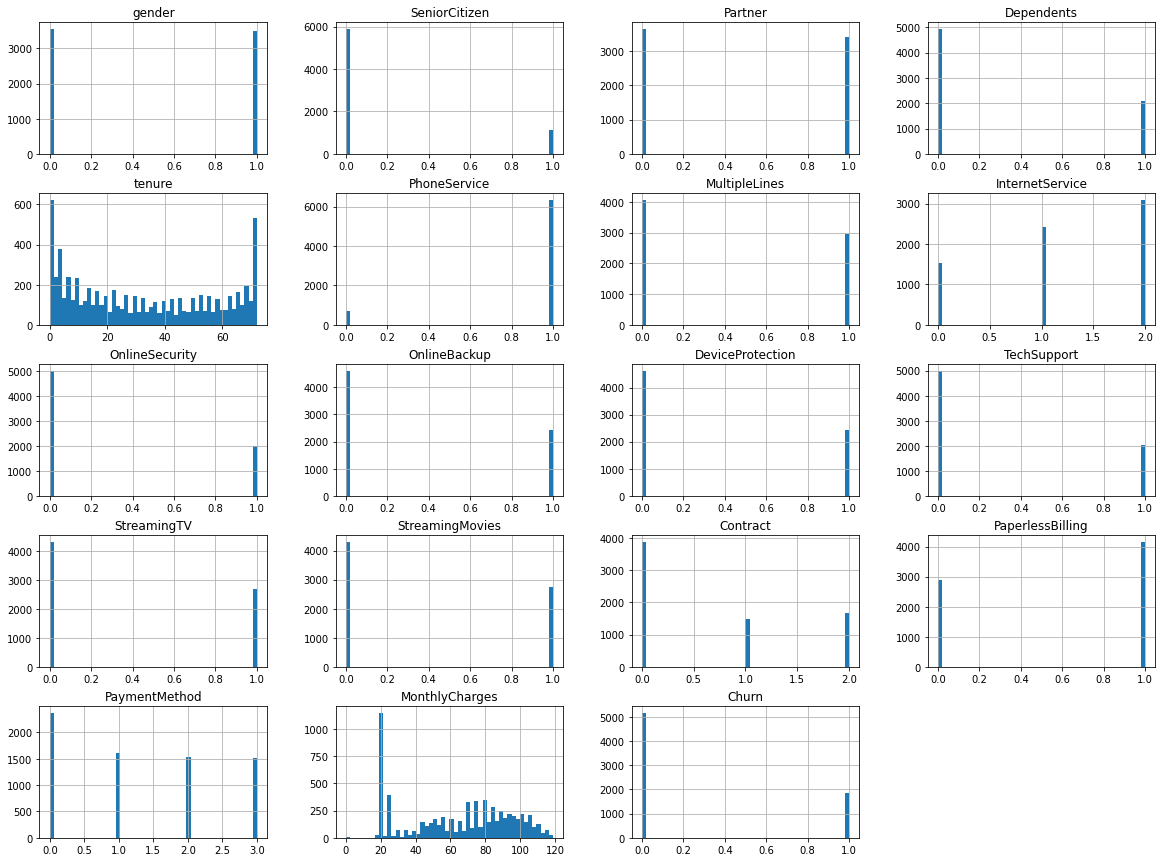

In [60]:
import matplotlib.pyplot as plt
customerchurn.hist(bins=50, figsize=(20,15))
plt.show()

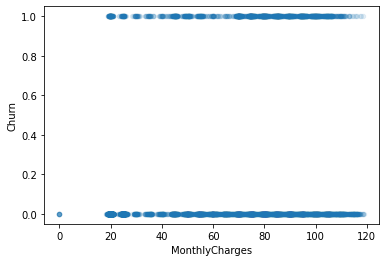

In [61]:
customerchurn.plot(kind="scatter", x="MonthlyCharges", y="Churn", alpha=0.1)

In [62]:
#

X=customerchurn.drop('Churn', axis=1)
Y=customerchurn['Churn']

In [63]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85
1,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95
2,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85
3,0,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,2,42.30
4,1,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70


In [64]:
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [65]:
# creating and loading a model , craeting a model starts if there is no  existing model it will create a new training model 

if os.path.exists("trained_model.pickle"):
  print("Loading Trained Model")
  model = pickle.load(open("trained_model.pickle", "rb"))
else:
  print("creating and training a new model")
  print("Model training started")

creating and training a new model
Model training started


TRAINING A NEW MODEL 

In [66]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(customerchurn.drop('Churn',axis=1), 
                                                  customerchurn['Churn'], test_size=0.20,           #test size here is 20% and training set is 80% so as to increase accurracy
                                                    random_state=42)

In [67]:
from sklearn import linear_model, model_selection
model = linear_model.LinearRegression()

In [68]:
model.fit(Xtrain,Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

SAVING MODEL


In [69]:
#saving model to a file 

with open("trained_model.pickle","wb") as file:
  pickle.dump(model, file)

  import os.path

In [70]:
train=pd.concat([Xtrain,Ytrain],axis=1)

In [71]:
Xtrain.shape                 


(5634, 18)

In [72]:
Xtest.shape

(1409, 18)

In [73]:
Ytrain.shape

(5634,)

In [74]:
Ytest.shape

(1409,)

DEFINING XBOOST


In [75]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        #to get the parameters of xgboost
        xgb_param = alg.get_xgb_params() 
        
        #to convert into a datastructure internally used by xgboost for training efficiency 
        # and speed
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        
        #xgb.cv is used to find the number of estimators required for the parameters 
        # which are set
        cvresult = xgb.cv(xgb_param, xgtrain, 
                          num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                        metrics='auc', early_stopping_rounds=early_stopping_rounds)
        
        #setting the n_estimators parameter using set_params
        alg.set_params(n_estimators=cvresult.shape[0])
        
        print(alg.get_xgb_params())
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Churn'],eval_metric='auc')
    
    return alg

In [76]:
def get_accuracy(alg,predictors):
    dtrain_predictions = alg.predict(Xtest[predictors])
    dtrain_predprob = alg.predict_proba(Xtest[predictors])[:,1]
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(Ytest.values, 
                                                      dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(Ytest.values, 
                                                           dtrain_predprob))

In [77]:
target = 'Churn'
IDcol = 'MonthlyCharges'

In [78]:
def XgbClass(learning_rate =0.1,n_estimators=1000,max_depth=5,min_child_weight=1,
             gamma=0,subsample=0.8,colsample_bytree=0.8):
    xgb1 = XGBClassifier(learning_rate=learning_rate,
                         n_estimators=n_estimators,
                         max_depth=max_depth,
                         min_child_weight=min_child_weight,
                         gamma=gamma,
                         subsample=subsample,
                         colsample_bytree=colsample_bytree)
    return xgb1

In [79]:
def drop_features(l):
    return [x for x in train.columns if x not in l]

In [80]:
from xgboost import XGBClassifier
import xgboost as xgb

In [81]:
predictors = drop_features([target, IDcol])
xgb1=XgbClass()
first_model=modelfit(xgb1, train, predictors)
xgb1.fit(train[predictors],train['Churn'])

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'missing': None, 'n_estimators': 34, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 0.8, 'verbosity': 1}


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=34, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

VIEWING CALCULATED MODEL ACCURACY AND AUC

In [82]:
get_accuracy(first_model,predictors)


Model Report
Accuracy : 0.8126
AUC Score (Train): 0.864320
